# Laboratório Prático: Regressão Linear

Bem-vindo ao seu primeiro laboratório prático! Neste laboratório, você implementará a regressão linear com uma variável para prever os lucros de uma franquia de restaurantes.


# Tópicos
- [ 1 - Pacotes ](#1)
- [ 2 - Regressão Linear com uma variável ](#2)
  - [ 2.1 Definição do problema](#2.1)
  - [ 2.2  Conjunto de Dados](#2.2)
  - [ 2.3 Revisão em Regressão Linear](#2.3)
  - [ 2.4  Cálculo do custo](#2.4)
    - [ Exercício 1](#ex01)
  - [ 2.5 Gradiente Descendente ](#2.5)
    - [ Exercício 2](#ex02)
  - [ 2.6 Aprendendo os parâmetros utilizando gradiente descedente em lote (_batch gradient descent_) ](#2.6)


In [1]:
# Baixar arquivos adicionais para o laboratório
!wget https://github.com/fabiobento/dnn-course-2024-1/blob/main/00_course_folder/ml_intro/class_02/5%20-%20Atividade%20Avaliativa%20-%20Regress%C3%A3o%20Linear/lab_utils_ml_intro_assig_week_2.zip
!unzip -n -q lab_utils_ml_intro_assig_week_2.zip

--2024-03-04 14:05:52--  https://github.com/fabiobento/dnn-course-2024-1/blob/main/00_course_folder/ml_intro/class_02/5%20-%20Atividade%20Avaliativa%20-%20Regress%C3%A3o%20Linear/lab_utils_ml_intro_assig_week_2.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7797 (7.6K) [text/plain]
Saving to: ‘lab_utils_ml_intro_assig_week_2.zip.1’

lab_utils_ml_intro_ 100%[===================>]   7.61K  --.-KB/s    in 0s      

2024-03-04 14:05:53 (35.6 MB/s) - ‘lab_utils_ml_intro_assig_week_2.zip.1’ saved [7797/7797]



<a name="1"></a>
# 1 - Pacotes 

Primeiro, vamos executar a célula abaixo para importar todos os pacotes de que você precisará durante esta tarefa.
- [numpy](www.numpy.org) é o pacote fundamental para trabalhar com matrizes em Python.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa para plotar gráficos em Python.
- ``utils.py`` contém funções auxiliares para este caderno. Não é necessário modificar o código desse arquivo.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

<a name="2"></a>
# 2 - Regressão Linear com uma variável 

<a name="2.1"></a>
## 2.1 -  Definição do problema
Suponha que você seja o CEO de uma franquia de restaurantes e esteja considerando diferentes cidades para abrir um novo ponto de venda.
- Você gostaria de expandir seus negócios para cidades que possam proporcionar lucros maiores ao seu restaurante.
- A rede já tem restaurantes em várias cidades e você tem dados sobre os lucros e a população dessas cidades.
- Você também tem dados sobre cidades que são candidatas a um novo restaurante. 
    - Para essas cidades, você tem a população da cidade.

Você pode usar os dados para ajudá-lo a identificar quais cidades podem potencialmente proporcionar maiores lucros à sua empresa?
<a name="2.2"></a>
## 2.2 - Conjunto de Dados

Você começará carregando o conjunto de dados para essa tarefa.
- A função`load_data()` abaixo carrega os dados nas variáveis `x_train` e `y_train`
  - `x_train` é a população da cidade
  - `y_train` é o lucro do restaurante naquela cidade. um valor negativo para o lucro indica um prejuízo.   
  - `x_train` e `y_train` são _numpy arrays_.

In [4]:
# Carregar o conjunto de dados
x_train, y_train = load_data()

#### Visualize as variáveis
Antes de iniciar qualquer tarefa em aprendizado de máquina, é útil se familiarizar mais com seu conjunto de dados.  
- Um bom ponto de partida é simplesmente imprimir cada variável e ver o que ela contém.

O código abaixo imprime a variável `x_train` e o tipo da variável.

In [5]:
# Imprimir x_train
print("Tipo de x_train:",type(x_train))
print("Os primeiros cinco elementos de x_train são:\n", x_train[:5]) 

Tipo de x_train: <class 'numpy.ndarray'>
Os primeiros cinco elementos de x_train são:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` é um _numpy array_ que contém valores decimais que são todos maiores que zero.
- Esses valores representam os valores das popuilações da cidade vezes 10.000
- Por exemplo, 6,1101 significa que a população dessa cidade é de 61.101 pessoas
  
Agora, vamos imprimir `y_train`

In [6]:
# imprimir y_train
print("Tipo de y_train:",type(y_train))
print("Os primeiros cinco elementos de y_train são:\n", y_train[:5])  

Tipo de y_train: <class 'numpy.ndarray'>
Os primeiros cinco elementos de y_train são:
 [17.592   9.1302 13.662  11.854   6.8233]


Da mesma forma, `y_train` é um _numpy array_ que tem valores decimais, alguns negativos, outros positivos.
- Eles representam os lucros médios mensais de seu restaurante em cada cidade, em unidades de \$10.000.
  - Por exemplo, 17,592 representa \$175.920 em lucros mensais médios para essa cidade.
  -2,6807 representa -\$26.807 de perda média mensal para aquela cidade.  

#### Verifique as dimensões de suas variáveis

Outra maneira útil de se familiarizar com seus dados é visualizar suas dimensões.

Imprima a forma de `x_train` e `y_train` e veja quantos exemplos de treinamento você tem em seu conjunto de dados.

In [7]:
print ('O formato de x_train é:', x_train.shape)
print ('O formato de y_train é: ', y_train.shape)
print ('Quantidade de exemplos de treinamento (m):', len(x_train))

O formato de x_train é: (97,)
O formato de y_train é:  (97,)
Quantidade de exemplos de treinamento (m): 97


O _numpy array_ de população da cidade tem 97 pontos de dados e a média mensal de lucros também tem 97 pontos de dados. Essas são matrizes NumPy 1D.

#### Visualize seus dados

Muitas vezes é útil entender os dados visualizando-os. 
- Para esse conjunto de dados, você pode usar um gráfico de dispersão para visualizar os dados, já que ele tem apenas duas propriedades a serem plotadas (lucro e população). 
- Muitos outros problemas que você encontrará na vida real têm mais de duas propriedades (por exemplo, população, renda familiar média, lucros mensais, vendas mensais). Quando você tem mais de duas propriedades, ainda pode usar um gráfico de dispersão para ver a relação entre cada par de propriedades.

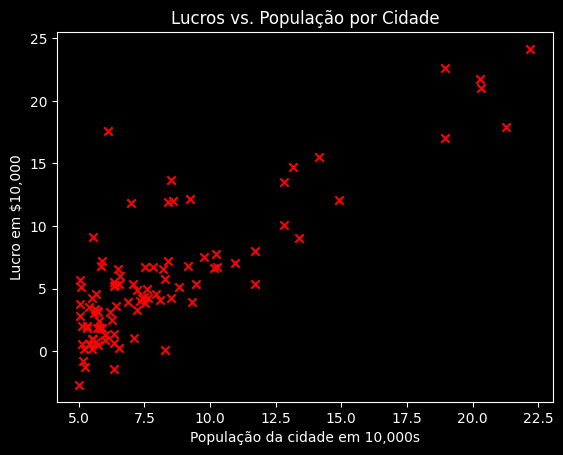

In [9]:
# Crie um gráfico de dispersão dos dados. Para alterar os marcadores para "x" vermelho,
# usamos os parâmetros 'marker' e 'c'
plt.scatter(x_train, y_train, marker='x', c='r') 

# Defina o título
plt.title("Lucros vs. População por Cidade")
# Defina o rótulo do eixo y
plt.ylabel('Lucro em $10,000')
# Defina o rótulo do eixo x
plt.xlabel('População da cidade em 10,000s')
plt.show()

Seu objetivo é criar um modelo de regressão linear para ajustar esses dados.
- Com esse modelo, você pode inserir a população de uma nova cidade e fazer com que o modelo estime os possíveis lucros mensais do seu restaurante para essa cidade.

<a name="2.3"></a>
## 2.3 - Revisão de Regressão Linear

Nesse laboratório prático, você irá ajustar os parâmetros de regressão linear $(w,b)$ ao seu conjunto de dados.
- A função do modelo para regressão linear, que é uma função que mapeia de `x` (população da cidade) para `y` (o lucro mensal de seu restaurante naquela cidade) é representada como
    $$f_{w,b}(x) = wx + b$$
    

- Para treinar um modelo de regressão linear, você deseja encontrar os melhores parâmetros $(w,b)$ que se ajustem ao seu conjunto de dados.

    - Para comparar como uma escolha de $(w,b)$ é melhor ou pior que outra escolha, você pode avaliá-la com uma função de custo J(w,b)$
      - $J$ é uma função de $(w,b)$. Isso é, o valo do custo $J(w,b)$ depende do valor de $(w,b)$.
  
    - A escolha de $(w,b)$ que melhor se ajusta a seus dados é aquele que tem o menor custo $J(w,b)$.

- Para encontrar os valores $(w,b)$ que obtêm o menor custo possível $J(w,b)$, você pode usar um método chamado gradiente descendente (**gradient descent**). 
  - A cada etapa da descida do gradiente, seus parâmetros $(w,b)$ se aproximam dos valores ideais que atingirão o menor custo $J(w,b)$.
  

- O modelo de regressão linear treinado pode, então, pegar o recurso de entrada $x$ (população da cidade) e gerar uma previsão $f_{w,b}(x)$ (lucro mensal previsto para um restaurante naquela cidade).

<a name="2.4"></a>
## 2.4 - Calcular custo

A descida gradiente envolve etapas repetidas para ajustar o valor do seu parâmetro $(w,b)$ para obter gradualmente um custo cada vez menor $J(w,b)$.
- Em cada etapa da descida do gradiente, será útil monitorar seu progresso calculando o custo $J(w,b)$ à medida que $(w,b)$ for atualizado. 
- Nesta seção, você implementará uma função para calcular $J(w,b)$ de modo que possa verificar o progresso da implementação da descida gradiente.


#### Função de custo
Como você deve se lembrar da aula, para uma variável, a função de custo da regressão linear $J(w,b)$ é definida como

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Você pode pensar em $f_{w,b}(x^{(i)})$ como a previsão do modelo do lucro do seu restaurante, em oposição a $y^{(i)}$, que é o lucro real registrado nos dados.
- $m$ é o número de exemplos de treinamento no conjunto de dados


#### Predição do modelo

- Para regressão linear com uma variável, a previsão do modelo $f_{w,b}$ para um exemplo $x^{(i)}$ é representada como:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Esta é a equação de uma reta, com uma interceptação $b$ e uma inclinação $w$

#### Implementação

Preencha a função `compute_cost()` abaixo para calcular o custo $J(w,b)$.

<a name="ex01"></a>
### Exercício 1

Complete a função `compute_cost` abaixo:

* Iterar sobre os exemplos de treinamento e, para cada exemplo, calcular:
    * A previsão do modelo para esse exemplo
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * O custo para esse exemplo $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Retorne o custo total sobre todos os exemplos
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Aqui, $m$ é o número de exemplos de treinamento e $\sum$ é o operador de soma

Se tiver dúvidas, você pode conferir as dicas apresentadas após a célula abaixo para ajudá-lo com a implementação.

In [15]:

def compute_cost(x, y, w, b): 
    """
    Calcula a função de custo para regressão linear.
    
    Args:
        x (ndarray): Formato (m,) Entrada pra o modelo (População das cidades) 
        y (ndarray): Formato (m,) Valores alvo (Lucro real por cidade)
        w, b (scalar): Parâmetros do modelo
    
    Returns
        total_cost (float): O custo de usar w,b como parâmetros para a regressão linear
               para ajustar os pontos de dados em x e y
    """
    # quantidade de exemplos de treino
    m = x.shape[0] 
    
    # você precisa retornar essa variável corretamente
    total_cost = 0
    
    ### INICIE SEU CÓDIGO AQUI ###
    
    ### TERMINE SEU CÓDIGO AQUI ###

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click aqui para dicas</b></font></summary>
    
    
   * Você pode representar um operador de soma, por exemplo: $h = \sum\limits_{i = 0}^{m-1} 2i$ no seguinte código:
    
    ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
  
   * Nesse caso, você pode iterar sobre todos os exemplos em `x` usando um loop for e adicionar o `cost` de cada iteração a uma variável (`cost_sum`) inicializada fora do loop.

   * Em seguida, você pode retornar o `total_cost` como `cost_sum` dividido por `2m`.
   * Se você for novato em Python, verifique se o código está devidamente recuado com espaços ou tabulações consistentes.
   
   Caso contrário, ele poderá produzir uma saída diferente ou gerar um erro `IndentationError: unexpected indent`. Você pode consultar [esse tópico](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) in our community for details.
   

    <details>
          <summary><font size="2" color="darkblue"><b> Click para mais dicas</b></font></summary>
        
    * Veja como você pode estruturar a implementação geral dessa função
    
    ```python 
    def compute_cost(x, y, w, b):
        # quantidade de exemplos de treino
        m = x.shape[0] 
    
        # Você precisa retornar essa variável corretamente
        total_cost = 0
    
        ### INICIE SEU CÓDIGO AQUI ###
        # Variável para manter o controle da soma do custo de cada exemplo
        cost_sum = 0
    
        # Fazer um loop sobre os exemplos de treinamento
        for i in range(m):
            # Seu código aqui para obter a previsão f_wb para o i-ésimo exemplo            
            f_wb = 
            # Seu código aqui para obter o custo associado ao i-ésimo exemplo            
            cost = 
        
            # Adicionar à soma do custo de cada exemplo
            cost_sum = cost_sum + cost 

        # Obtenha o custo total como a soma dividida por (2*m)
        total_cost = (1 / (2 * m)) * cost_sum
        ### TERMINE SEU CÓDIGO AQUI ###

        return total_cost
    ```
    
    * Se ainda estiver com dúvidas, você pode consultar as dicas apresentadas abaixo para descobrir como calcular `f_wb` e `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; Para os escalares  $a$, $b$ e $c$ (<code>x[i]</code>, <code>w</code> e <code>b</code> são todos escalares), você pode calcular a equação $h = ab + c$ no código como <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate cost</b></font></summary>
          &emsp; &emsp; You can calculate the square of a variable z as z**2
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate cost</b></font></summary>
              &emsp; &emsp; You can compute cost as <code>cost = (f_wb - y[i]) ** 2</code>
          </details>
    </details>
        
    </details>

</details>

    


You can check if your implementation was correct by running the following test code:

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 75.203 </td> 
  </tr>
</table>

<a name="2.5"></a>
## 2.5 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [ ]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    
   ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
   ```
    
   * In this case, you can iterate over all the examples in `x` using a for loop and for each example, keep adding the gradient from that example to the variables `dj_dw` and `dj_db` which are initialized outside the loop. 

   * Then, you can return `dj_dw` and `dj_db` both divided by `m`.    
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    
    ```python 
    def compute_gradient(x, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          x (ndarray): Shape (m,) Input to the model (Population of cities) 
          y (ndarray): Shape (m,) Label (Actual profits for the cities)
          w, b (scalar): Parameters of the model  
        Returns
          dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
          dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
        """
    
        # Number of training examples
        m = x.shape[0]
    
        # You need to return the following variables correctly
        dj_dw = 0
        dj_db = 0
    
        ### START CODE HERE ### 
        # Loop over examples
        for i in range(m):  
            # Your code here to get prediction f_wb for the ith example
            f_wb = 
            
            # Your code here to get the gradient for w from the ith example 
            dj_dw_i = 
        
            # Your code here to get the gradient for b from the ith example 
            dj_db_i = 
     
            # Update dj_db : In Python, a += 1  is the same as a = a + 1
            dj_db += dj_db_i
        
            # Update dj_dw
            dj_dw += dj_dw_i
    
        # Divide both dj_dw and dj_db by m
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        ### END CODE HERE ### 
        
        return dj_dw, dj_db
    ```
        
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; You did this in the previous exercise! For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_i</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>f_wb</code>, <code>y[i]</code> and <code>x[i]</code> are all scalars), you can calculate the equation $h = (a - b)c$ in code as <code>h = (a-b)*c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute dj_dw_i as <code>dj_dw_i = (f_wb - y[i]) * x[i] </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
             &emsp; &emsp; You can compute dj_db_i as <code> dj_db_i = f_wb - y[i] </code>
    </details>
        
    </details>

</details>

    


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [ ]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>

**Congratulations on completing this practice lab on linear regression! Next week, you will create models to solve a different type of problem: classification. See you there!**

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>